## Importing modules

In [3]:
import matplotlib.pyplot as plt
import nilearn.image as image
from nilearn.image import resample_to_img
from nilearn import datasets
from nilearn.maskers import NiftiMasker
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_img, plot_anat, plot_stat_map, plot_roi, plot_design_matrix, plot_contrast_matrix, view_img
import numpy as np
import os
import glob
import nibabel as nib
import pandas as pd
from pathlib import Path
import tracemalloc

C:\Users\ilari\AppData\Roaming\Python\Python39\site-packages\nilearn\glm\__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


## Defining global variables

In [50]:
#path_data = '/data/rainville/PAINxEFFORT/PREPROCESSED_SPM'
path_data= 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images'
path_events = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python'
path_mask = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images/output brain mask/gm_group_binarized_mask.nii'
path_output = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain'

sub = "sub-004"

t_r = 0.832

In [51]:
design_matrices = [os.path.join(path_data,sub,"func",d) for d in os.listdir(os.path.join(path_data, sub ,"func")) if "swvrsub" in d and "design_matrices" in d and not d.startswith("._")]
design_matrices.sort()
#print(design_matrices, sep = "\n")
[print(i) for i in design_matrices]

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-01_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-02_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-03_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-04_desc-design_matrices.tsv.gz


[None, None, None, None]

In [52]:
#visualize event file of design matrix 
design_matrix = pd.read_csv(design_matrices[0])
design_matrix

,Unnamed: 0,ContractionPain_30,ContractionPain_5,ContractionSolo_30,ContractionSolo_5,ContractionWarm_30,ContractionWarm_5,Pain_30,Pain_5,Warm_30,...,drift_9,drift_10,drift_11,drift_12,drift_13,drift_14,drift_15,drift_16,drift_17,constant
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044061,0.044060,0.044059,0.044058,0.044057,0.044055,0.044054,0.044052,0.044050,1.0
1,0.832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044028,0.044019,0.044009,0.043999,0.043987,0.043975,0.043962,0.043947,0.043932,1.0
2,1.664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043962,0.043937,0.043910,0.043881,0.043849,0.043814,0.043777,0.043738,0.043696,1.0
3,2.496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043862,0.043814,0.043762,0.043704,0.043642,0.043574,0.043502,0.043424,0.043342,1.0
4,3.328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043729,0.043651,0.043564,0.043469,0.043366,0.043254,0.043135,0.043007,0.042871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,852.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043729,0.043651,-0.043564,0.043469,-0.043366,0.043254,-0.043135,0.043007,-0.042871,1.0
1026,853.632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043862,0.043814,-0.043762,0.043704,-0.043642,0.043574,-0.043502,0.043424,-0.043342,1.0
1027,854.464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043962,0.043937,-0.043910,0.043881,-0.043849,0.043814,-0.043777,0.043738,-0.043696,1.0
1028,855.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044028,0.044019,-0.044009,0.043999,-0.043987,0.043975,-0.043962,0.043947,-0.043932,1.0


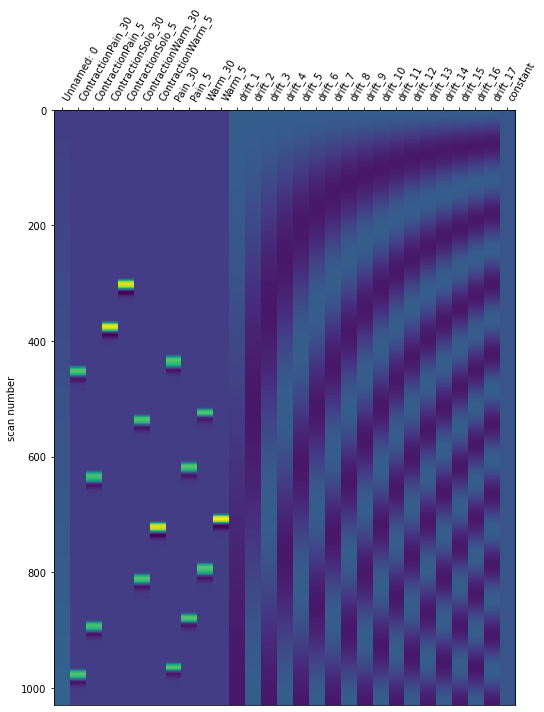

In [53]:
# Plot the design matrix

design_matrix_run1 = pd.read_csv(design_matrices[0])
design_matrix_run1
plot_design_matrix(design_matrix_run1)
plt.show()

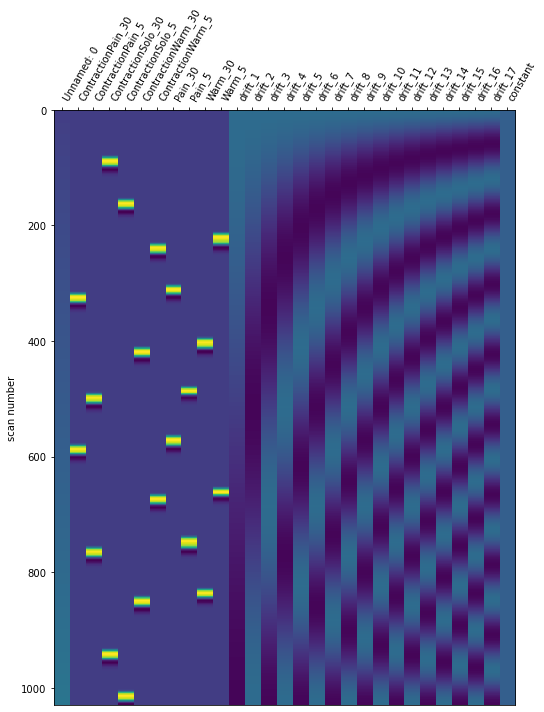

In [54]:
design_matrix_run2 = pd.read_csv(design_matrices[1])
design_matrix_run2
plot_design_matrix(design_matrix_run2)
plt.show()

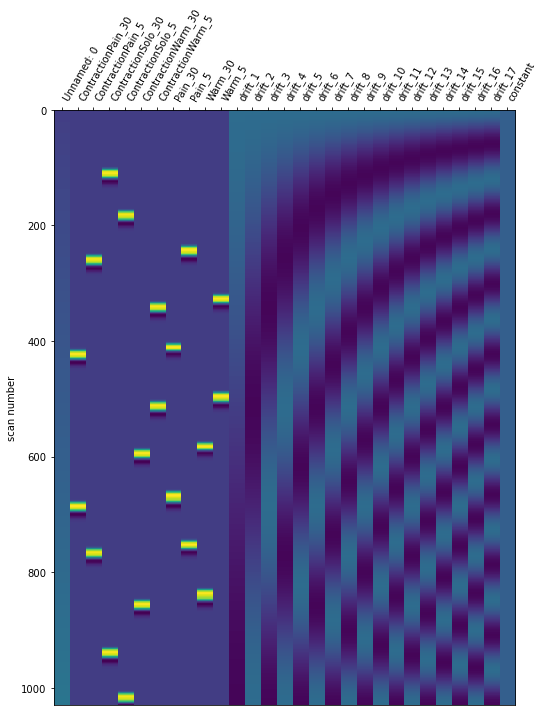

In [55]:
design_matrix_run3 = pd.read_csv(design_matrices[2])
plot_design_matrix(design_matrix_run3)
design_matrix_run3
plt.show()

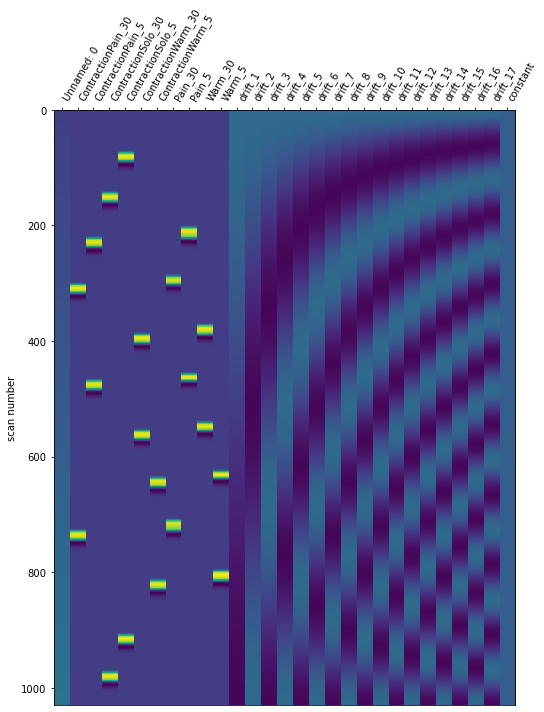

In [56]:
design_matrix_run4 = pd.read_csv(design_matrices[3])
plot_design_matrix(design_matrix_run4)
design_matrix_run4
plt.show()

In [57]:
beta_maps_run1 = [os.path.join(path_data,sub,"func",d) for d in os.listdir(os.path.join(path_data, sub ,"func")) if "swvrsub" in d and "run-01" in d and "maps" in d and not d.startswith("._")]
beta_maps_run1.sort()
beta_maps_run2 = [os.path.join(path_data,sub,"func",d) for d in os.listdir(os.path.join(path_data, sub ,"func")) if "swvrsub" in d and "run-02" in d and "maps" in d and not d.startswith("._")]
beta_maps_run2.sort()
beta_maps_run3 = [os.path.join(path_data,sub,"func",d) for d in os.listdir(os.path.join(path_data, sub ,"func")) if "swvrsub" in d and "run-03" in d and "maps" in d and not d.startswith("._")]
beta_maps_run3.sort()
beta_maps_run4 = [os.path.join(path_data,sub,"func",d) for d in os.listdir(os.path.join(path_data, sub ,"func")) if "swvrsub" in d and "run-04" in d and "maps" in d and not d.startswith("._")]
beta_maps_run4.sort()
#print(beta_maps_run1, beta_maps_run2, beta_maps_run3, beta_maps_run4)
[print(i) for i in beta_maps_run1]
[print(i) for i in beta_maps_run2]
[print(i) for i in beta_maps_run3]
[print(i) for i in beta_maps_run4]

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-01_desc-all contraction thermal stim - thermal stim-maps.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-01_desc-contraction 30%-5%-maps.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-01_desc-contractionSolo 30%-5%-maps.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-01_desc-pain - warm-maps.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-02_desc-contraction 30%-5%-maps.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images\sub-004\func\swvrsub-004_task-pain_run-02_desc-contractionSolo 30%-5%-maps.nii.gz
C:/Users/ilari

[None, None, None]

In [58]:
run1_beta_map_contr30_5 = nib.load(beta_maps_run1[0])
run1_beta_map_contrsolo30_5 = nib.load(beta_maps_run1[0])
run1_beta_map_pain_warm = nib.load(beta_maps_run1[0])
run1_beta_map_all_contr = nib.load(beta_maps_run1[0])

run2_beta_map_contr30_5 = nib.load(beta_maps_run1[1])
run2_beta_map_contrsolo30_5 = nib.load(beta_maps_run1[1])
run2_beta_map_pain_warm = nib.load(beta_maps_run1[1])
run2_beta_map_all_contr = nib.load(beta_maps_run1[1])

run3_beta_map_contr30_5 = nib.load(beta_maps_run1[2])
run3_beta_map_contrsolo30_5 = nib.load(beta_maps_run1[2])
run3_beta_map_pain_warm = nib.load(beta_maps_run1[2])
run3_beta_map_all_contr = nib.load(beta_maps_run1[2])

run4_beta_map_contr30_5 = nib.load(beta_maps_run1[3])
run4_beta_map_contrsolo30_5 = nib.load(beta_maps_run1[3])
run4_beta_map_pain_warm = nib.load(beta_maps_run1[3])
run4_beta_map_all_contr = nib.load(beta_maps_run1[3])

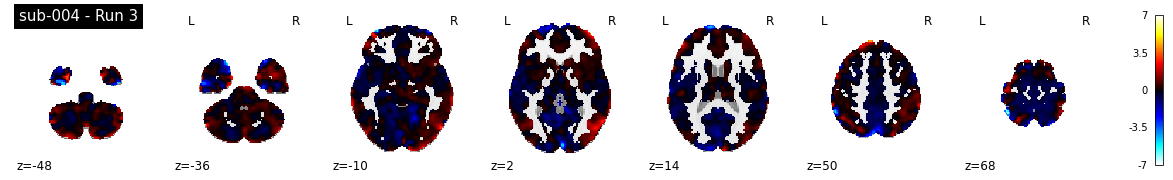

In [59]:
plot_stat_map(
    run3_beta_map_all_contr,
    display_mode="z",
    title=f"{sub} - Run 3",
)

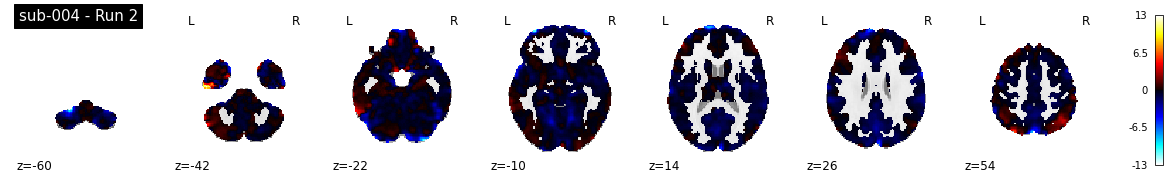

In [60]:
plot_stat_map(
    run2_beta_map_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)

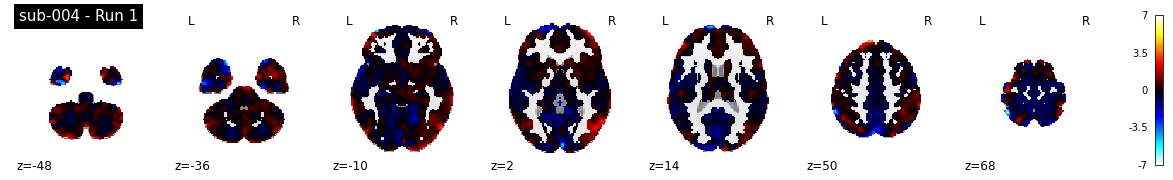

In [61]:
plot_stat_map(
    run1_beta_map_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 1",
)